# Modeling Core Interaction Networks of TCGA-BRCA
TCGA: The Cancer Genome Atlas  
BRCA: Breast Invasive Carcinoma

# Importing Libraries and Configurations

In [1]:
import os
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Add project root to Python's path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from config import (
    BRCA_INTERIM_FILES_DIRS,
    BRCA_PROCESSED_FILES_DIRS,
    INTERACTION_INFERENCE_PARAMETERS,
)

# Data Preparation

In [2]:
cohorts = list(BRCA_PROCESSED_FILES_DIRS.keys())
cohorts.remove('project')

for cohort in cohorts:
    processed_file_path = os.path.join(
        BRCA_PROCESSED_FILES_DIRS[cohort],
        INTERACTION_INFERENCE_PARAMETERS['processed-file']
    )
    
    df_interactions = pd.read_csv(processed_file_path, low_memory=False) \
        .query('is_interaction_of_interest == 1') \
        .drop(columns=['is_interaction_of_interest']) \
        .reset_index(drop=True)
    
    interim_file_path = os.path.join(
        BRCA_INTERIM_FILES_DIRS[cohort],
        'inferred-interactions-of-interest.csv'
    )
        
    df_interactions.to_csv(interim_file_path, index=False)

In [3]:
cohorts = list(BRCA_INTERIM_FILES_DIRS.keys())
interactions_of_interest = dict()

for cohort in cohorts:
    interactions_of_interest[cohort] = pd.read_csv(
        os.path.join(
            BRCA_INTERIM_FILES_DIRS[cohort],
            'inferred-interactions-of-interest.csv'
        )
    )

In [4]:
interactions_of_interest['basal-like']

,accession_id,mirna_name,gene_name,correlation,pvalue
0,MIMAT0000062,hsa-let-7a-5p,CCNJL,-0.312514,0.001605
1,MIMAT0000064,hsa-let-7c-5p,ADIPOR2,-0.325673,0.001042
2,MIMAT0000064,hsa-let-7c-5p,E2F2,-0.354196,0.000382
3,MIMAT0000064,hsa-let-7c-5p,BZW1,-0.304257,0.002084
4,MIMAT0000064,hsa-let-7c-5p,JOSD1,-0.330921,0.000872
...,...,...,...,...,...
1116,MIMAT0022834,hsa-miR-365b-3p,IKZF4,-0.306882,0.001919
1117,MIMAT0022834,hsa-miR-365b-3p,GXYLT1,-0.312495,0.001605
1118,MIMAT0022834,hsa-miR-365b-3p,MGAT5,-0.325545,0.001046
1119,MIMAT0022834,hsa-miR-365b-3p,IFNLR1,-0.304422,0.002073


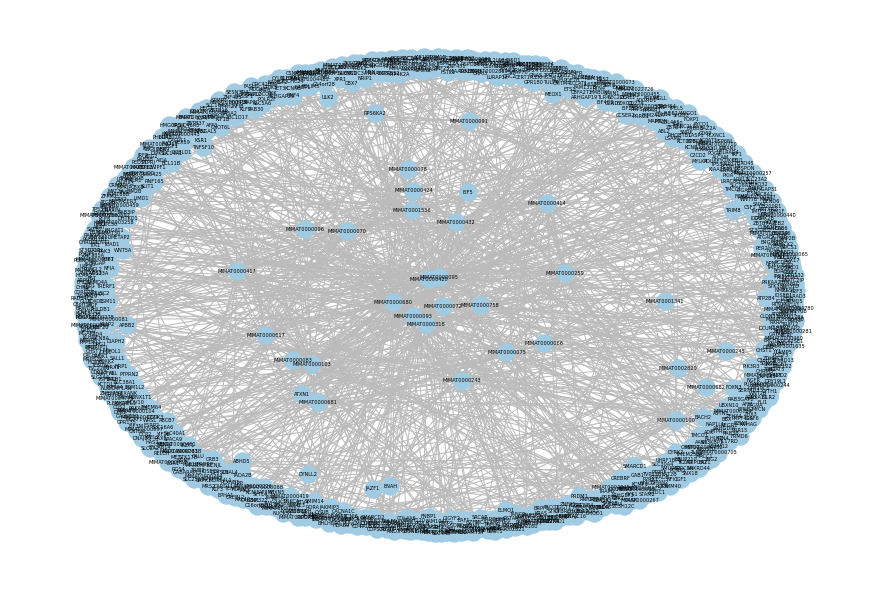

In [5]:
# G = nx.Graph()
G = nx.from_pandas_edgelist(
    df=interactions_of_interest['basal-like'],
    source='accession_id',
    target='gene_name',
)

# nx.draw(G, with_labels=False)
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=2, iterations=100)
nx.draw(G, pos,
        with_labels=True, 
        node_color='#A0CBE2', 
        edge_color='#BBBBBB',
        font_size=5,
        font_color='black')

plt.show()